In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
dados_treinamento = pd.read_csv('train.csv')

In [3]:
dados_treinamento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploração dos Dados

In [4]:
dados_treinamento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- SibSp: Quantidade de irmãos mais quantidade de cônjujes
- Parch: Quantidade de pais mais quantidade de filhos
- Ticket: Número da passagem
- Fare: Tarifa do passageiro
- Cabin: Número da cabine
- Embarked: Porto de embarque

#### Analisando a existência de dados redundantes

In [5]:
dados_treinamento['Name'].value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [6]:
dados_treinamento['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

#### Analisando a coluna Ticket

In [7]:
# Passageiros com mesmo ticket pertencem a mesma família. Portanto, a tarifa de embarque é a mesma
dados_treinamento[dados_treinamento['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


#### Analisando a coluna Cabin

In [8]:
# Nem todos os passageiros de uma mesma cabine pertencem a mesma família
dados_treinamento[dados_treinamento['Cabin'] == 'F33']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5,F33,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0,F33,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5,F33,S


## Eliminação Manual de Atributos

In [9]:
# Retirando algumas colunas
dados_para_tratamento = dados_treinamento.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis = 1)

## Tratando dados NaN

#### Na coluna Age

In [10]:
dados_para_tratamento[dados_para_tratamento['Age'].isna()]

,Survived,Pclass,Sex,Age,Fare,Cabin
5,0,3,male,NaN,8.4583,NaN
17,1,2,male,NaN,13.0000,NaN
19,1,3,female,NaN,7.2250,NaN
26,0,3,male,NaN,7.2250,NaN
28,1,3,female,NaN,7.8792,NaN
...,...,...,...,...,...,...
859,0,3,male,NaN,7.2292,NaN
863,0,3,female,NaN,69.5500,NaN
868,0,3,male,NaN,9.5000,NaN
878,0,3,male,NaN,7.8958,NaN


In [11]:
# Vou pegar a média da idade dos passageiros passageiros em que 'Age' é NaN
media_homens = dados_para_tratamento[dados_para_tratamento['Sex'] == 'male']['Age'].mean().round()
print(media_homens)
media_mulheres = dados_para_tratamento[dados_para_tratamento['Sex'] == 'female']['Age'].mean().round()
print(media_mulheres)

# Adicionando as médias de idade aos passageiros com 'Age' NaN de acordo com o sexo
dados_para_tratamento.loc[(dados_para_tratamento['Sex'] == 'male') & (dados_para_tratamento['Age'].isna()), 'Age'] = media_homens
dados_para_tratamento.loc[(dados_para_tratamento['Sex'] == 'female') & (dados_para_tratamento['Age'].isna()), 'Age'] = media_mulheres

dados_para_tratamento[dados_para_tratamento['Age'].isna()]


31.0
28.0


,Survived,Pclass,Sex,Age,Fare,Cabin


#### Na coluna Cabin

In [12]:
dados_para_tratamento[dados_para_tratamento['Cabin'].isna()]

,Survived,Pclass,Sex,Age,Fare,Cabin
0,0,3,male,22.0,7.2500,NaN
2,1,3,female,26.0,7.9250,NaN
4,0,3,male,35.0,8.0500,NaN
5,0,3,male,31.0,8.4583,NaN
7,0,3,male,2.0,21.0750,NaN
...,...,...,...,...,...,...
884,0,3,male,25.0,7.0500,NaN
885,0,3,female,39.0,29.1250,NaN
886,0,2,male,27.0,13.0000,NaN
888,0,3,female,28.0,23.4500,NaN


In [13]:
dados_para_tratamento.loc[(dados_para_tratamento['Pclass'] == 2) & (dados_para_tratamento['Cabin'].isna())]

,Survived,Pclass,Sex,Age,Fare,Cabin
9,1,2,female,14.0,30.0708,NaN
15,1,2,female,55.0,16.0000,NaN
17,1,2,male,31.0,13.0000,NaN
20,0,2,male,35.0,26.0000,NaN
33,0,2,male,66.0,10.5000,NaN
...,...,...,...,...,...,...
866,1,2,female,27.0,13.8583,NaN
874,1,2,female,28.0,24.0000,NaN
880,1,2,female,25.0,26.0000,NaN
883,0,2,male,28.0,10.5000,NaN


In [14]:
dados_para_tratamento.loc[(dados_para_tratamento['Pclass'] == 3) & (dados_para_tratamento['Cabin'].isna())]

,Survived,Pclass,Sex,Age,Fare,Cabin
0,0,3,male,22.0,7.2500,NaN
2,1,3,female,26.0,7.9250,NaN
4,0,3,male,35.0,8.0500,NaN
5,0,3,male,31.0,8.4583,NaN
7,0,3,male,2.0,21.0750,NaN
...,...,...,...,...,...,...
882,0,3,female,22.0,10.5167,NaN
884,0,3,male,25.0,7.0500,NaN
885,0,3,female,39.0,29.1250,NaN
888,0,3,female,28.0,23.4500,NaN


#### Retirando a coluna Cabin

In [15]:
dados_para_tratamento = dados_para_tratamento.drop(['Cabin'], axis = 1)

#### Categorizando a coluna Sex

In [16]:
dados_para_tratamento.loc[dados_para_tratamento['Sex'] == 'male','Sex'] = 0
dados_para_tratamento.loc[dados_para_tratamento['Sex'] == 'female', 'Sex'] = 1
# tranformando a coluna Sex em int
dados_para_tratamento['Sex'] = dados_para_tratamento['Sex'].astype(int)
dados_para_tratamento.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
Fare        float64
dtype: object

### Analisando o balanceamento do número de sobreviventes

In [17]:
# Exibindo a contagem de cada classe
print(dados_para_tratamento['Survived'].value_counts())

# Selecionando aleatoriamente 342 dados da classe 0
nao_sobreviventes = dados_para_tratamento[dados_para_tratamento['Survived'] == 0].sample(n=342, random_state=42) 

# Selecionando todos os dados da classe 1
sobreviventes = dados_para_tratamento[dados_para_tratamento['Survived'] == 1]

# Concatenando as duas classes para obter um dataset balanceado
dados_para_tratamento = pd.concat([sobreviventes, nao_sobreviventes])

# Embaralhando as linhas do dataset final
dados_para_tratamento = dados_para_tratamento.sample(frac=1, random_state=42).reset_index(drop=True)

print(dados_para_tratamento['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    342
1    342
Name: count, dtype: int64


# Iniciando o treinamento

In [18]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

def normalizar(X):
    min_values = X.min(axis=0)
    max_values = X.max(axis=0)
    X = (X - min_values) / (max_values - min_values)
    return X

In [19]:
RANDOM_STATE = 2
BATCH_SIZE = 32

X = np.array(dados_para_tratamento.drop(['Survived'], axis = 1))
Y = np.array(dados_para_tratamento['Survived'])

# Normalizando os dados
X = padronizar_normal(X)

# Separando em dados de treino e validação
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
print('Número de neuronios: ',num_neuronios)

X_train: (547, 4)
Y_train: (547,)
X_val: (137, 4)
Y_val: (137,)
Número de neuronios:  8.95


In [20]:
# Criando o modelo
model = Sequential()
model.add(Dense(9, input_dim=4, kernel_initializer='normal' ,activation='relu'))
model.add(Dense(9, input_dim=4, kernel_initializer='normal' ,activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


optmizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optmizer, metrics=['accuracy']) #mean squared error é usada para problemas de regressão. binary_crossentropy é usada para problemas de classificação.

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=BATCH_SIZE, validation_data=(X_val, Y_val), verbose=1, callbacks=[es])

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4848 - loss: 0.6931 - val_accuracy: 0.4672 - val_loss: 0.6928
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6005 - loss: 0.6924 - val_accuracy: 0.6642 - val_loss: 0.6917
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6653 - loss: 0.6908 - val_accuracy: 0.6934 - val_loss: 0.6886
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7516 - loss: 0.6857 - val_accuracy: 0.7226 - val_loss: 0.6814
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7714 - loss: 0.6756 - val_accuracy: 0.7518 - val_loss: 0.6678
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7777 - loss: 0.6590 - val_accuracy: 0.7445 - val_loss: 0.6479
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7486 - loss: 0.6437 - val_accuracy: 0.7518 - val_loss: 0.6230
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8002 - loss: 0.6003 - val_accuracy: 0.7591 - 

--> Acuracia (treino): 0.7952
--> Acuracia (validacao): 0.8102
--> Ein - Eval = -0.0150
--> val_loss - train_loss = 0.0039



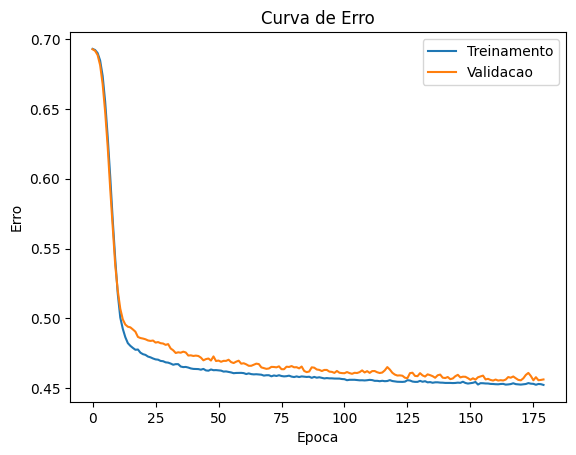

In [22]:
# Calculando a acuracia
_, accuracy_train = model.evaluate(X_train, Y_train, batch_size=BATCH_SIZE, verbose=0)
_, accuracy_val = model.evaluate(X_val, Y_val, batch_size=BATCH_SIZE, verbose=0)

# Plotando os resultados
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])


print(f'--> Acuracia (treino): {accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}") 
print(f"--> val_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report (treino):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       278
           1       0.79      0.79      0.79       269

    accuracy                           0.80       547
   macro avg       0.80      0.80      0.80       547
weighted avg       0.80      0.80      0.80       547

Matriz de confusao (treino):
[[223  55]
 [ 57 212]]


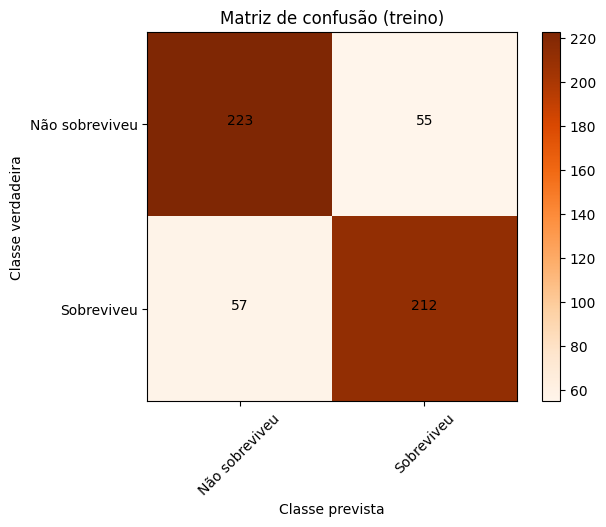

In [23]:
# Avaliando o modelo com o classification report e a matriz de confusao
Y_pred_train = np.round(model.predict(X_train))
print('Classification Report (treino):')
print(classification_report(Y_train, Y_pred_train))

matriz_confusao = confusion_matrix(Y_train, Y_pred_train)
print('Matriz de confusao (treino):')
print(matriz_confusao)
classes = ['Não sobreviveu', 'Sobreviveu']
plt.imshow(matriz_confusao, cmap='Oranges')
plt.title('Matriz de confusão (treino)')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe prevista')
# Adicionando os valores numéricos dentro das células
for i in range(matriz_confusao.shape[0]):
    for j in range(matriz_confusao.shape[1]):
        plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="black") # Adiciona o valor da célula
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report (validação):
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        64
           1       0.83      0.81      0.82        73

    accuracy                           0.81       137
   macro avg       0.81      0.81      0.81       137
weighted avg       0.81      0.81      0.81       137

Matriz de confusao (validação):
[[52 12]
 [14 59]]


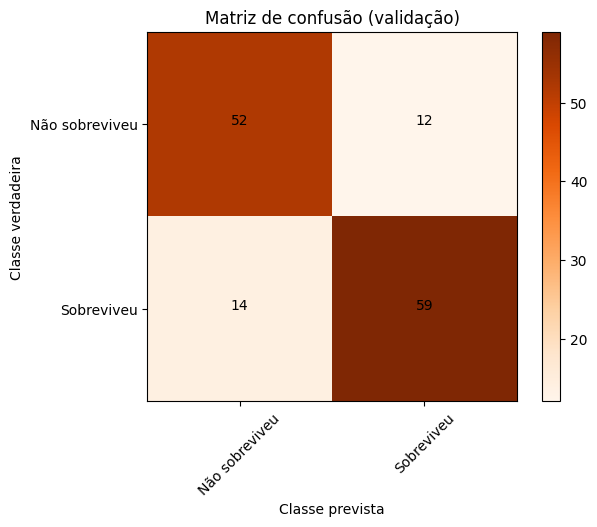

In [24]:
# Avaliando o modelo com o classification report
Y_pred_val = np.round(model.predict(X_val))
print('Classification Report (validação):')
print(classification_report(Y_val, Y_pred_val))

matriz_confusao = confusion_matrix(Y_val, Y_pred_val)
print('Matriz de confusao (validação):')
print(matriz_confusao)
classes = ['Não sobreviveu', 'Sobreviveu']
plt.imshow(matriz_confusao, cmap='Oranges')
plt.title('Matriz de confusão (validação)')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe prevista')
# Adicionando os valores numéricos dentro das células
for i in range(matriz_confusao.shape[0]):
    for j in range(matriz_confusao.shape[1]):
        plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="black") # Adiciona o valor da célula
plt.show()

# Dados de Teste

In [25]:
dados_teste = pd.read_csv('test.csv')
dados_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [26]:
# Checando a existencia de dados redundantes
print(dados_teste['Name'].value_counts())
print(dados_teste['PassengerId'].value_counts())

dados_teste = dados_teste.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Cabin'], axis = 1)
dados_teste

Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64
PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64


,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


#### Retirando os valores NaN da coluna Age

In [27]:
# Retirando os dados NaN da coluna Age
# Vou pegar a média da idade dos passageiros nos passageiros  em que 'Age' é NaN
media_homens = dados_teste[dados_teste['Sex'] == 'male']['Age'].mean().round()
print(media_homens)
media_mulheres = dados_teste[dados_teste['Sex'] == 'female']['Age'].mean().round()
print(media_mulheres)

# Adicionando as médias de idade aos passageiros com 'Age' NaN de acordo com o sexo
dados_teste.loc[(dados_teste['Sex'] == 'male') & (dados_teste['Age'].isna()), 'Age'] = media_homens
dados_teste.loc[(dados_teste['Sex'] == 'female') & (dados_teste['Age'].isna()), 'Age'] = media_mulheres

dados_teste[dados_teste['Age'].isna()]

30.0
30.0


,Pclass,Sex,Age,Fare


#### Retirando os valores NaN da coluna Fare

In [28]:
# Obtendo a media de 'Fare' e adicionando aos dados NaN
media_tarifa = dados_teste['Fare'].mean().round()
dados_teste.loc[dados_teste['Fare'].isna(), 'Fare'] = media_tarifa

#### Categorizando a coluna Sex

In [29]:
dados_teste.loc[dados_teste['Sex'] == 'male','Sex'] = 0
dados_teste.loc[dados_teste['Sex'] == 'female', 'Sex'] = 1
# tranformando a coluna Sex em int
dados_teste['Sex'] = dados_teste['Sex'].astype(int)
dados_teste.dtypes

Pclass      int64
Sex         int32
Age       float64
Fare      float64
dtype: object

In [30]:
# Normalizando os dados
X_test = np.array(dados_teste)
X_test = padronizar_normal(X_test)

Y_pred_test = np.round(model.predict(X_test))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


# Verificando o resultado do teste

In [31]:
dados_verdadeiros_do_teste = pd.read_csv('gender_submission.csv')
dados_verdadeiros_do_teste

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Classification Report (teste):
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       266
           1       0.80      0.98      0.88       152

    accuracy                           0.90       418
   macro avg       0.89      0.92      0.90       418
weighted avg       0.92      0.90      0.91       418

Matriz de confusao (teste):
[[229  37]
 [  3 149]]


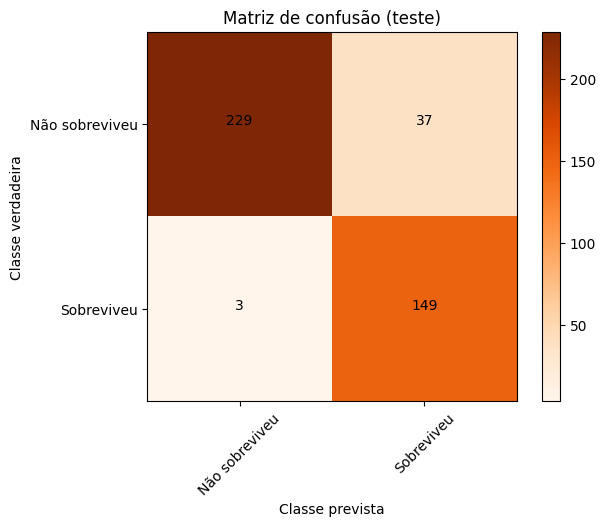

In [32]:
Y_test = np.array(dados_verdadeiros_do_teste['Survived'])
print('Classification Report (teste):')
print(classification_report(Y_test, Y_pred_test))

matriz_confusao = confusion_matrix(Y_test, Y_pred_test)
print('Matriz de confusao (teste):')
print(matriz_confusao)
classes = ['Não sobreviveu', 'Sobreviveu']
plt.imshow(matriz_confusao, cmap='Oranges')
plt.title('Matriz de confusão (teste)')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe prevista')
# Adicionando os valores numéricos dentro das células
for i in range(matriz_confusao.shape[0]):
    for j in range(matriz_confusao.shape[1]):
        plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="black") # Adiciona o valor da célula
plt.show()

- Precision: Dados que o modelo classificou e que realmente sao 0, divididos por todos que ele classificou como 0
- Recall: Dados que o modelo classificou e que realmente sao 0, divididos pelos que de fato sao 0 (de acordo com os dados)

# Que tipo de pessoa tem mais probabilidade de sobreviver?

In [33]:
dados_teste['Survived'] = Y_pred_test
print('Classe Economica:')
print(dados_teste[dados_teste['Survived'] == 1]['Pclass'].value_counts())
print('\nSexo:')
print(dados_teste[dados_teste['Survived'] == 1]['Sex'].value_counts())
print('\nIdade:')
print(dados_teste[dados_teste['Survived'] == 1]['Age'].value_counts())

Classe Economica:
Pclass
1    85
3    69
2    32
Name: count, dtype: int64

Sexo:
Sex
1    149
0     37
Name: count, dtype: int64

Idade:
Age
30.00    42
22.00    10
18.00     7
24.00     7
45.00     6
23.00     6
36.00     6
27.00     5
29.00     5
26.00     4
31.00     4
20.00     4
33.00     4
39.00     4
48.00     4
21.00     4
60.00     3
1.00      3
35.00     3
37.00     3
55.00     3
19.00     3
17.00     3
38.00     2
8.00      2
64.00     2
12.00     2
50.00     2
16.00     2
28.00     2
25.00     2
2.00      2
47.00     2
41.00     2
63.00     1
51.00     1
54.00     1
59.00     1
0.17      1
58.00     1
9.00      1
0.92      1
53.00     1
42.00     1
18.50     1
13.00     1
6.00      1
28.50     1
32.50     1
15.00     1
61.00     1
10.00     1
76.00     1
43.00     1
3.00      1
Name: count, dtype: int64


In [34]:
# Agora com os dados verdadeiros
dados_teste['Really Survived'] = Y_test
print('Classe Economica:')
print(dados_teste[dados_teste['Really Survived'] == 1]['Pclass'].value_counts())
print('\nSexo:')
print(dados_teste[dados_teste['Really Survived'] == 1]['Sex'].value_counts())
print('\nIdade:')
print(dados_teste[dados_teste['Really Survived'] == 1]['Age'].value_counts())

Classe Economica:
Pclass
3    72
1    50
2    30
Name: count, dtype: int64

Sexo:
Sex
1    152
Name: count, dtype: int64

Idade:
Age
30.00    31
22.00    10
45.00     7
18.00     7
29.00     5
36.00     5
23.00     5
24.00     5
26.00     4
20.00     4
27.00     4
48.00     4
60.00     3
21.00     3
33.00     3
31.00     3
35.00     3
55.00     3
19.00     3
1.00      3
39.00     2
37.00     2
38.00     2
64.00     2
47.00     2
12.00     2
28.00     2
16.00     2
17.00     2
10.00     1
43.00     1
51.00     1
54.00     1
25.00     1
59.00     1
0.17      1
58.00     1
76.00     1
2.00      1
9.00      1
0.92      1
53.00     1
50.00     1
18.50     1
8.00      1
63.00     1
15.00     1
3.00      1
Name: count, dtype: int64
